# Welcome to DataSpell!
DataSpell is an Integrated Development Environment (IDE) that is,
dedicated to specific tasks for exploratory data analysis and prototyping ML (machine learning) models.

#### Execute Python code
To execute any Python code, just type it in the code cell. Use the cell type switcher in the editor toolbar to change the cell type.
Click the **Run** button on the cell toolbar or press `Ctrl + Enter` to start execution.
Preview the execution output under the code area.

#### Add a table
Create a table using `pandas` data frame. If the package is not installed on your
environment, place the caret on the import statement, press `Alt (option) + Enter`, and select the **Install package** action.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4692 entries, 0 to 4691
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       4692 non-null   object 
 1   Name of State / UT         4692 non-null   object 
 2   Latitude                   4692 non-null   float64
 3   Longitude                  4692 non-null   float64
 4   Total Confirmed cases      4692 non-null   int64  
 5   Death                      4692 non-null   object 
 6   Cured/Discharged/Migrated  4692 non-null   int64  
 7   New cases                  4692 non-null   int64  
 8   New deaths                 4692 non-null   int64  
 9   New recovered              4692 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 366.7+ KB
[[    0     0     0]
 [    0     0     0]
 [    0     1     0]
 ...
 [60558  4078     0]
 [ 5233   246     0]
 [58962  2816     0]]


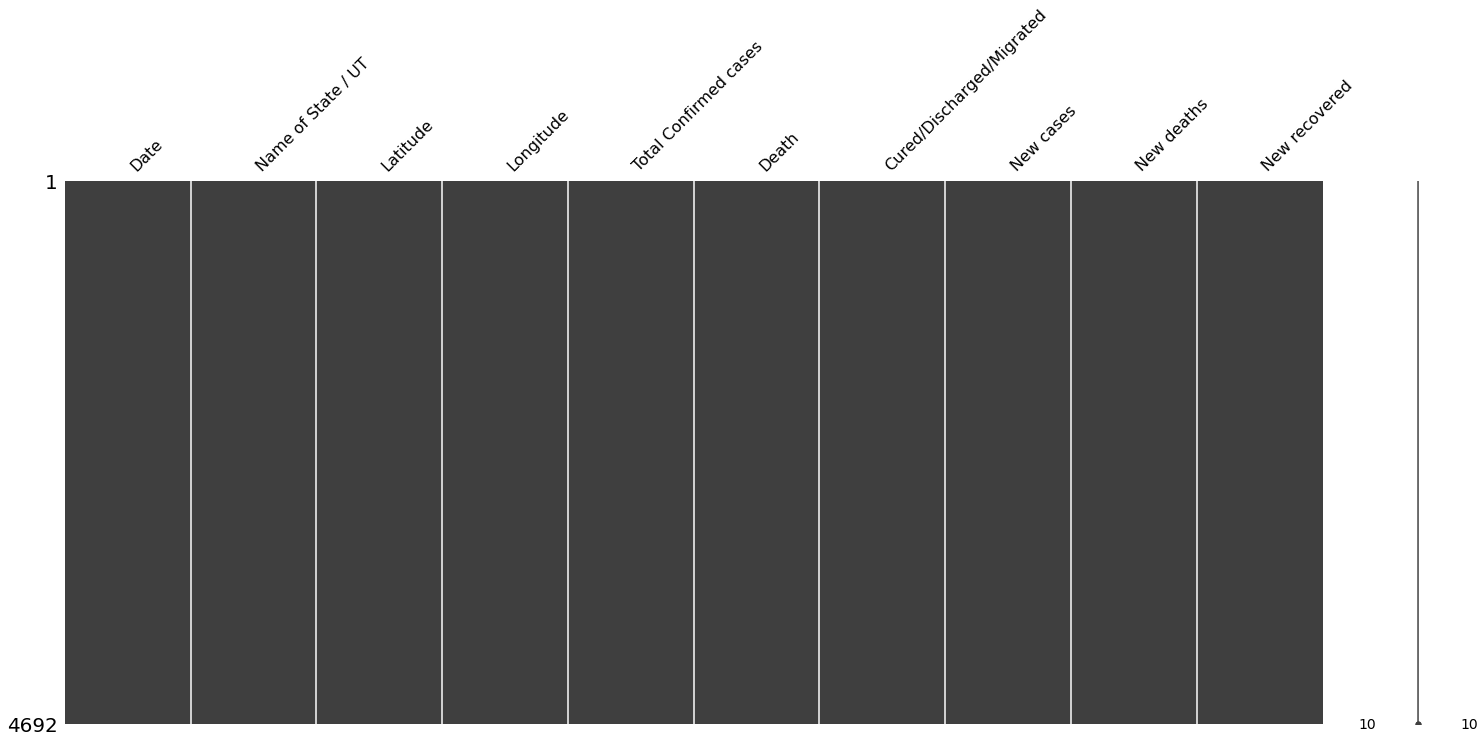

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
from sklearn.impute import SimpleImputer
Imputer= SimpleImputer(missing_values=np.nan, strategy='mean')

dataset = pd.read_excel('cases.xls')
#dataset.drop("Tests conducted by Private Labs",axis=1,inplace=True)
#dataset.drop("Total Positive Cases",axis=1,inplace=True)
#dataset.drop("Positive cases from samples reported",axis=1,inplace=True)
#dataset.drop("Sample Reported today",axis=1,inplace=True)
default = 0
#dataset.info()
#dataset[:, pd.isnull(dataset).all(axis=1)] = default
#dataset.info()
dataset.dropna()
X = dataset.iloc[:, 6:9].values
y = dataset.iloc[:, 9].values

#dataset = Imputer().fit_transform(dataset)
msno.matrix(dataset)
dataset.info()



You can sort data in a column by clicking its header. If needed, you can select a table fragment, right-click it, and copy to paste in a data file.

#### Build and view plots
If your notebook cell involves any code that plots charts, you can save the graphics or copy it into the clipboard. Click the **More Options** icon in the upper-right corner of the chart output and select the target action.

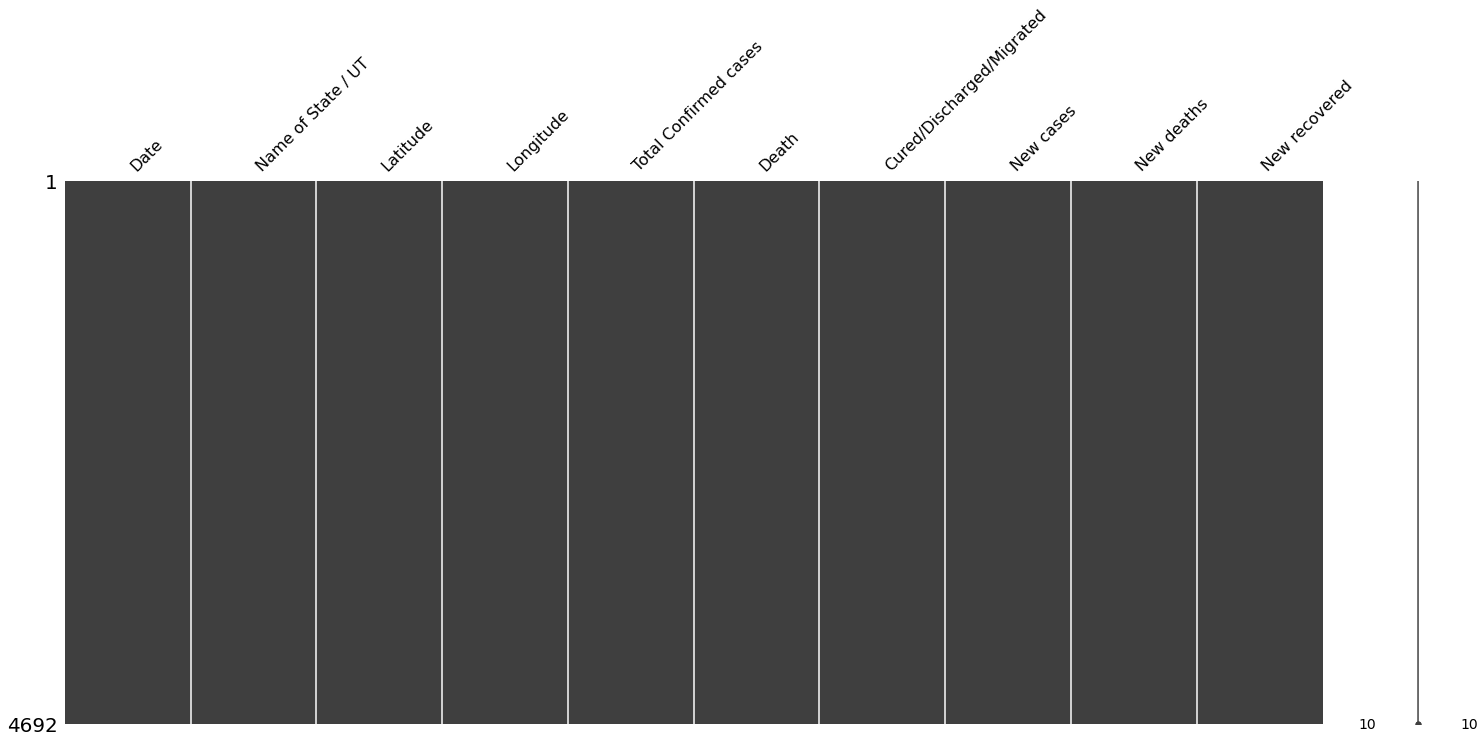

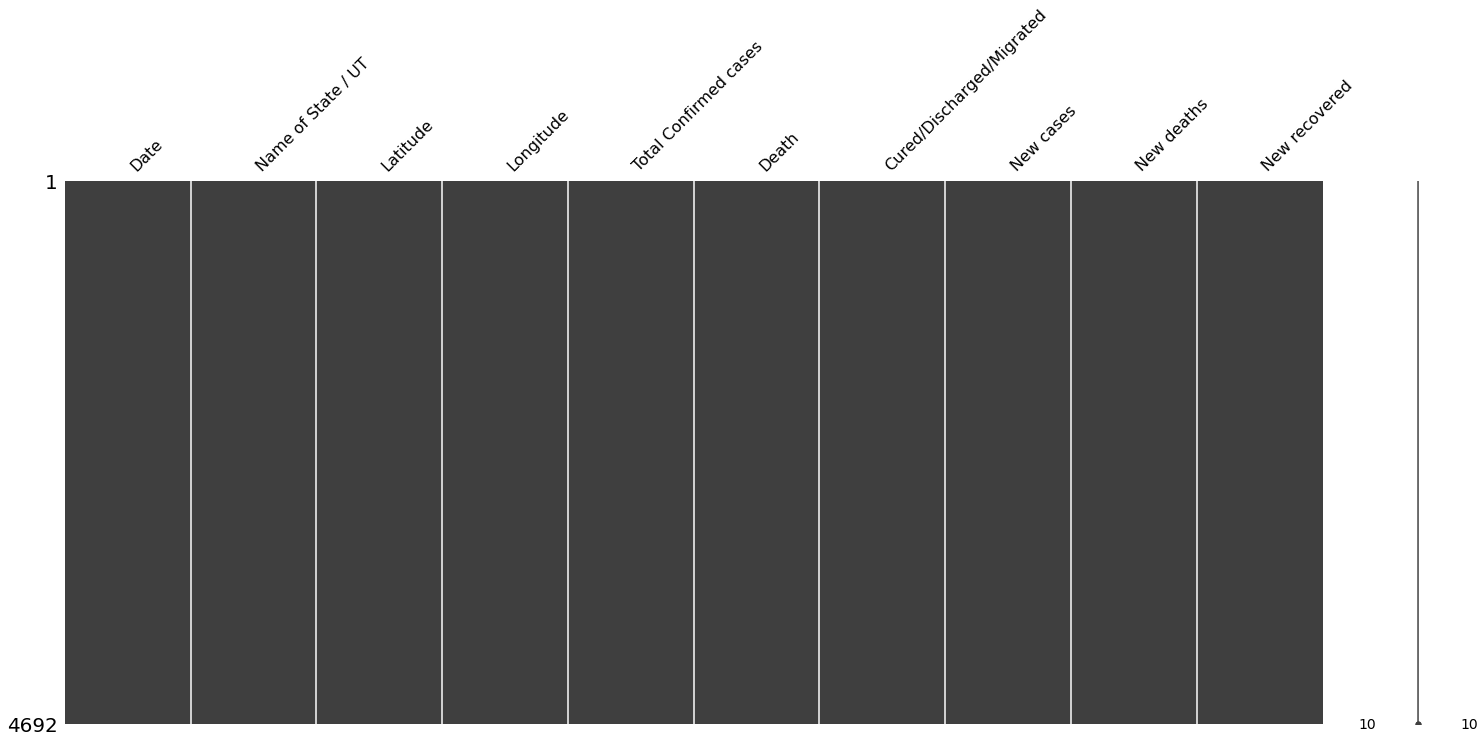

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
le = LabelEncoder()
target_columns=[
    "New cases","New deaths","New recovered"
]
#dataset=[dataset.columns[dataset.columns.isin(target_columns)]]
msno.matrix(dataset)
dataset.dropna(axis=0, how='any', inplace=True)
msno.matrix(dataset)
#for col in dataset.columns:
   # dataset = dataset.astype({col: str}, errors='raise')
#for var in target_columns:
  #  dataset[var+str("_enc")] = le.fit_transform(dataset[var])

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [5]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 1)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [6]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0,max_iter=500)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=0)

In [8]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)

In [9]:
#making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [2]:
# Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 0].min() - 1,
                               stop = X_set[:, 0].max() + 1, step = 0.01))

#plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel()]).T).reshape(X1.shape), alpha = 0.75,
 #            cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 0],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend

# show scatter plot
plt.show()

NameError: name 'X_train' is not defined

In [1]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), ]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 0],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()

# show scatter plot
plt.show()

NameError: name 'X_test' is not defined

Add more code or Markdown cells:
* Add a cell after the very last cell
* Add a cell right after the selected cell
* Insert a new cell after executing the selected cell

You can find these actions in the **Cell** menu.

To edit a Markdown cell, double-click it and start typing.
To preview the output, press `Shift + Enter`.

For more information about DataSpell see the [DataSpell Web Help](https://www.jetbrains.com/help/dataspell/2020.3/).